In [ ]:
from tsfast.basics import *

In [ ]:
external_datasets_simulation

[functools.partial(<function create_dls_downl>, download_function=<function wiener_hammerstein>, u=['u0'], y=['y0'], win_sz=400),
 functools.partial(<function create_dls_downl>, download_function=<function silverbox>, u=['u0'], y=['y0'], win_sz=400),
 functools.partial(<function create_dls_downl>, download_function=<function robot_forward>, u=['u0', 'u1', 'u2', 'u3', 'u4', 'u5'], y=['y0', 'y1', 'y2', 'y3', 'y4', 'y5'], win_sz=300, valid_stp_sz=4),
 functools.partial(<function create_dls_downl>, download_function=<function noisy_wh>, u=['u0'], y=['y0'], win_sz=100, stp_sz=50),
 functools.partial(<function create_dls_downl>, download_function=<function emps>, u=['u0'], y=['y0'], win_sz=300)]

In [ ]:
dls = external_datasets_simulation[0]()

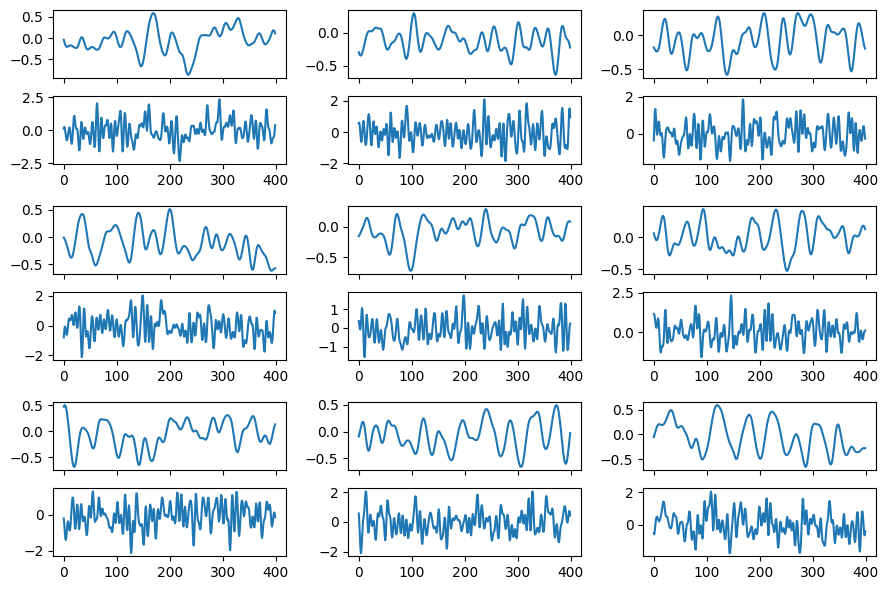

In [ ]:
dls.show_batch()

In [ ]:
from fastai.basics import default_device
default_device(True)

device(type='mps')

In [ ]:
dls = create_dls_wh(cached=True,num_workers=0)

In [ ]:
lrn = RNNLearner(dls,n_skip=50,hidden_size=100,rnn_type='lstm')

In [ ]:
lrn.fit_flat_cos(1,lr=3e-3,pct_start=0.3)

epoch,train_loss,valid_loss,fun_rmse,time


In [ ]:
for dl_func in external_datasets_simulation:
    dls = dl_func()
    lrn = RNNLearner(dls,n_skip=50,rnn_type='lstm')
    lrn.fit_flat_cos(10,lr=3e-3,pct_start=0.3)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.000978,0.000317,0.017807,00:13
1,0.000176,0.000117,0.010807,00:13
2,0.000095,0.000056,0.007452,00:13
3,0.000051,0.000037,0.006049,00:13


KeyboardInterrupt: 

In [ ]:
for dl_func in external_datasets_simulation:
    dls = dl_func()
    lrn = RNNLearner(dls,n_skip=50)
    lrn.fit_flat_cos(10,lr=3e-3,pct_start=0.3)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.000968,0.000378,0.019432,00:01
1,0.000193,0.000134,0.011561,00:01
2,0.000093,0.000053,0.007248,00:01
3,0.000044,0.000036,0.005986,00:01
4,0.000028,0.000018,0.004253,00:01
5,0.000016,0.000012,0.003441,00:01
6,0.000011,0.000010,0.003119,00:02
7,0.000008,0.000008,0.002766,00:01
8,0.000007,0.000007,0.002632,00:01
9,0.000007,0.000007,0.002603,00:01


Dataset not found. Downloading it to "/home/pheenix/.tsfast/datasets/silverbox"


epoch,train_loss,valid_loss,fun_rmse,time
0,0.000211,0.000044,0.006628,00:01
1,0.000011,0.000005,0.002183,00:01
2,0.000008,0.000005,0.002323,00:01
3,0.000008,0.000004,0.002050,00:01
4,0.000006,0.000006,0.002464,00:01
5,0.000006,0.000005,0.002137,00:01
6,0.000005,0.000005,0.002223,00:01
7,0.000005,0.000004,0.002021,00:01
8,0.000005,0.000004,0.002034,00:01
9,0.000005,0.000004,0.002019,00:01


Dataset not found. Downloading it to "/home/pheenix/.tsfast/datasets/robot_forward"


epoch,train_loss,valid_loss,fun_rmse,time
0,747.930786,738.944153,26.873350,00:02
1,660.345825,659.715271,25.386581,00:02
2,517.697388,572.012817,23.732477,00:02
3,403.812531,541.184143,23.090782,00:02
4,236.081314,486.420807,21.852058,00:02
5,149.075760,493.135345,21.869619,00:02
6,108.087379,500.793030,21.993153,00:02
7,87.744240,519.308533,22.333958,00:02
8,77.661545,523.593140,22.404219,00:02
9,75.705475,522.311218,22.376392,00:02


Dataset not found. Downloading it to "/home/pheenix/.tsfast/datasets/noisy_wh"


epoch,train_loss,valid_loss,fun_rmse,time
0,0.006742,0.008157,0.089538,00:02
1,0.006190,0.007913,0.087991,00:02
2,0.006202,0.007996,0.088453,00:02
3,0.006318,0.007883,0.087757,00:02
4,0.006361,0.007891,0.087836,00:02
5,0.006174,0.007897,0.087821,00:02
6,0.006178,0.007884,0.087778,00:02
7,0.006058,0.007885,0.087773,00:02
8,0.005950,0.007865,0.087658,00:02
9,0.006210,0.007868,0.087674,00:02


Dataset not found. Downloading it to "/home/pheenix/.tsfast/datasets/emps"


epoch,train_loss,valid_loss,fun_rmse,time
0,0.006378,0.006923,0.083203,00:01
1,0.006304,0.006962,0.083441,00:01
2,0.006311,0.006920,0.083187,00:01
3,0.006233,0.007103,0.084281,00:01
4,0.006267,0.006971,0.083493,00:01
5,0.006255,0.007035,0.083873,00:02
6,0.006297,0.006697,0.081832,00:01
7,0.005975,0.006597,0.081223,00:01
8,0.006180,0.006977,0.083527,00:01
9,0.006135,0.006955,0.083397,00:01


In [ ]:
dls = create_dls_silverbox('silverbox')
lrn = RNNLearner(dls,n_skip=50)
lrn.fit_flat_cos(10,lr=3e-3,pct_start=0.3)

Dataset not found. Downloading it to "silverbox"


epoch,train_loss,valid_loss,fun_rmse,time
0,0.000133,0.000042,0.006468,00:01
1,0.000012,0.000007,0.002652,00:02
2,0.000007,0.000004,0.002101,00:02
3,0.000007,0.000004,0.002075,00:02
4,0.000006,0.000005,0.002137,00:01
5,0.000006,0.000004,0.002017,00:01
6,0.000005,0.000005,0.002136,00:02
7,0.000005,0.000004,0.002024,00:02
8,0.000005,0.000004,0.002029,00:01
9,0.000005,0.000004,0.002019,00:01


In [ ]:
lrn.validate(2)

(#2) [1.5178629837464541e-06,0.0010259893024340272]

In [ ]:
preds = lrn.get_preds(2)

In [ ]:
preds[0][0]

(#3) [tensor([[-0.0037],
        [-0.0019],
        [-0.0012],
        ...,
        [ 0.1545],
        [ 0.1739],
        [ 0.1003]]),tensor([[-0.0037],
        [-0.0019],
        [-0.0012],
        ...,
        [ 0.0037],
        [ 0.0035],
        [ 0.0023]]),tensor([[-0.0045],
        [-0.0072],
        [-0.0136],
        ...,
        [ 0.0661],
        [ 0.0740],
        [ 0.0416]])]

[<matplotlib.lines.Line2D>]

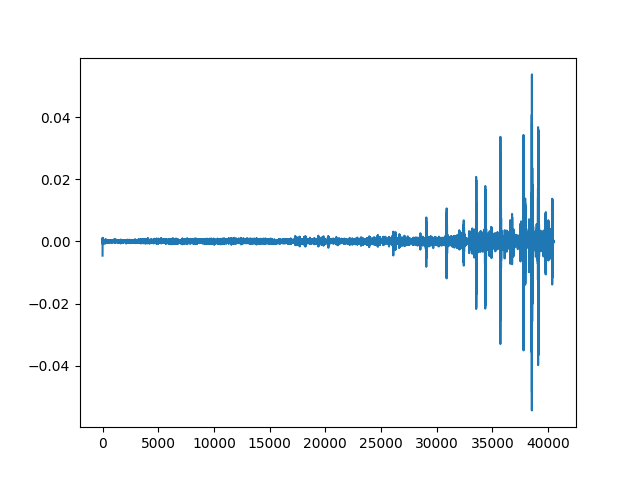

In [ ]:
from fastai.basics import *
plt.figure()
plt.plot(preds[0][1]-preds[1][1])

In [ ]:
%matplotlib widget

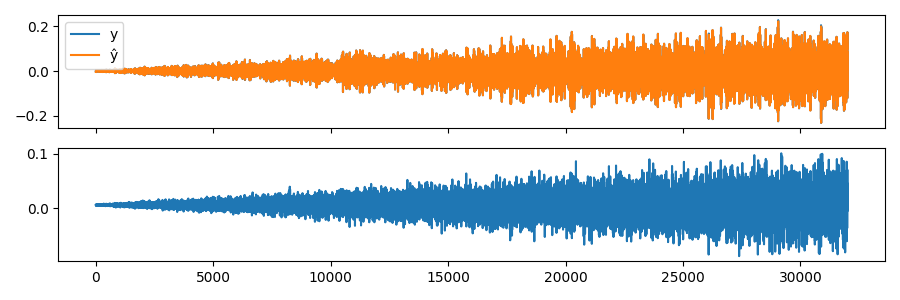

In [ ]:
lrn.show_results(2)

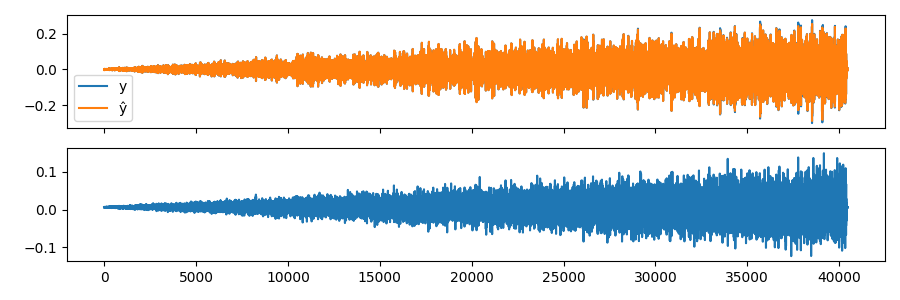

In [ ]:
lrn.show_results(2)